In [4]:
import VMC_NQS as vmc
from VMC_NQS import *


In [5]:
def run_param(J,h):
    importlib.reload(vmc)
    L = 10
    J = J
    h= h
    nqs = keras.models.Sequential([
        layers.Input(shape=(L,1 )),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        
        layers.Dense(1, activation=None)
    ])
    nqs.summary()
    #nqs2.optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    initial_config = np.ones((L,), dtype=np.float32)  # shape: (L,L)
    initial_config.shape
    
    epoch = 300
    samples = 10000
    steps = 250
    lr = 1e-3
    max_loops =16
    loop_count = 0
    E= None
    Lss_val=None
    optmizer=None
    E,Lss_val, optmizer = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                                 n_samples=samples,met_steps=steps,
                                 lr=lr,model=nqs,
                                J=J,h=h,optimizer=optmizer, E=E, lss_val= Lss_val 
                                 
                                )
    
    while np.abs(np.mean(E[-50:]) - np.mean(E[-100:-50]))>= 0.01 and loop_count < max_loops:
        epoch = 20
        samples = samples
        loop_count +=1
        if loop_count%3 ==0:
            steps = 2*steps
            lr = 0.1*lr
            
        
        E,Lss_val, optmizer = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                                 n_samples=samples,met_steps=steps,
                                 lr=lr,model=nqs,
                                J=J,h=h,optimizer=optmizer, E=E, lss_val= Lss_val 
                                 
                                )
    
    samples=vmc.metropolis_sample_tf(nqs,initial_config,1000,100)
    L = len(samples[0])  
    num_samples = len(samples)  
    
    # ⟨σ_i^z σ_j^z⟩
    correlation = np.zeros(L)
    cor_l = []
    for r in range(L):
        cor = tf.reduce_mean(samples*tf.roll(samples,shift=-r,axis=1),axis=0)
        cor_l.append(cor)
        correlation[r] = tf.reduce_mean(cor)
    mag = tf.reduce_mean(samples,axis=0)
    print('magnetization shape',mag.shape)
    
    vmc.clear_output()
    
    mean_energy = np.mean(vmc.local_energy_tf(nqs,samples,J,h,tr=False)[0])
    print('energy=', mean_energy)
    nqs.summary()
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.plot(range(len(E)),E)
    plt.axhline(mean_energy,linestyle = ':', c='r')
    plt.title('E vs itr')
    plt.xlabel('training steps-->')
    plt.ylabel('Loc_Energy')
    #add gap in the two subplots
    #plt.subplots_adjust(hspace=0.5)
    
    plt.subplot(2,2,2)
    plt.plot(range(len(Lss_val)),Lss_val)
    plt.title('loss vs itr')
    plt.xlabel('training steps-->')
    plt.ylabel('loss')
    plt.axhline(0,linestyle = ':', c= 'r')
    
    plt.subplot(2,2,3)
    plt.title('correlation vs length')
    plt.plot(correlation,'--o')
    plt.ylabel(r'$\langle \sigma_{i} \sigma_{r} \rangle $')
    plt.xlabel(r'r$\rightarrow$')
    
    plt.subplot(2,2,4)
    plt.plot(mag,'--o')
    plt.grid(True)
    plt.title('mag of chain')
    plt.ylim(-1.2,1.2)
    plt.ylabel('magnetization')
    plt.xlabel('lattice site -->')
    
    plt.show()

energy= -12.673783


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

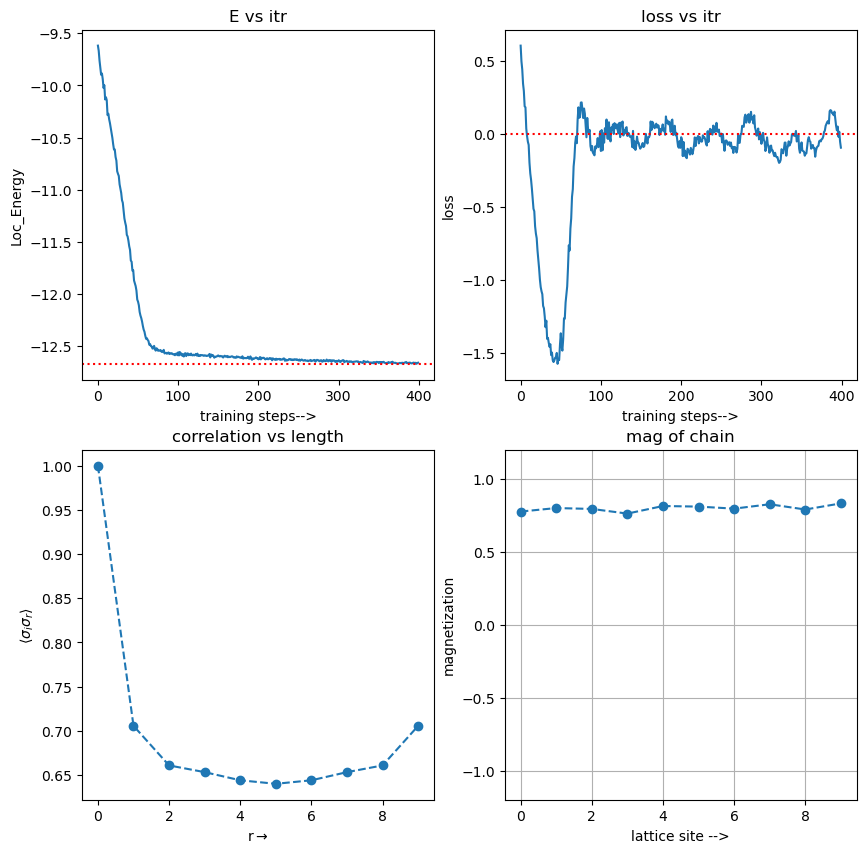

In [9]:
run_param(1,1)

energy= -10.005422


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

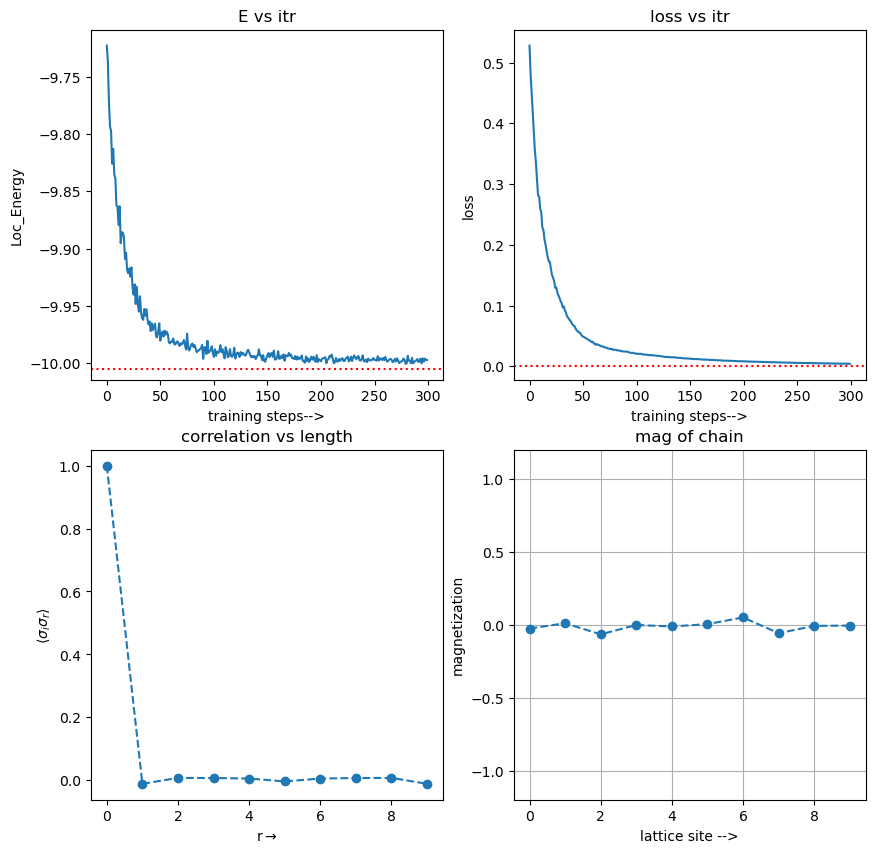

In [10]:
run_param(J=0.0001,h=1)

energy= -9.960058


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

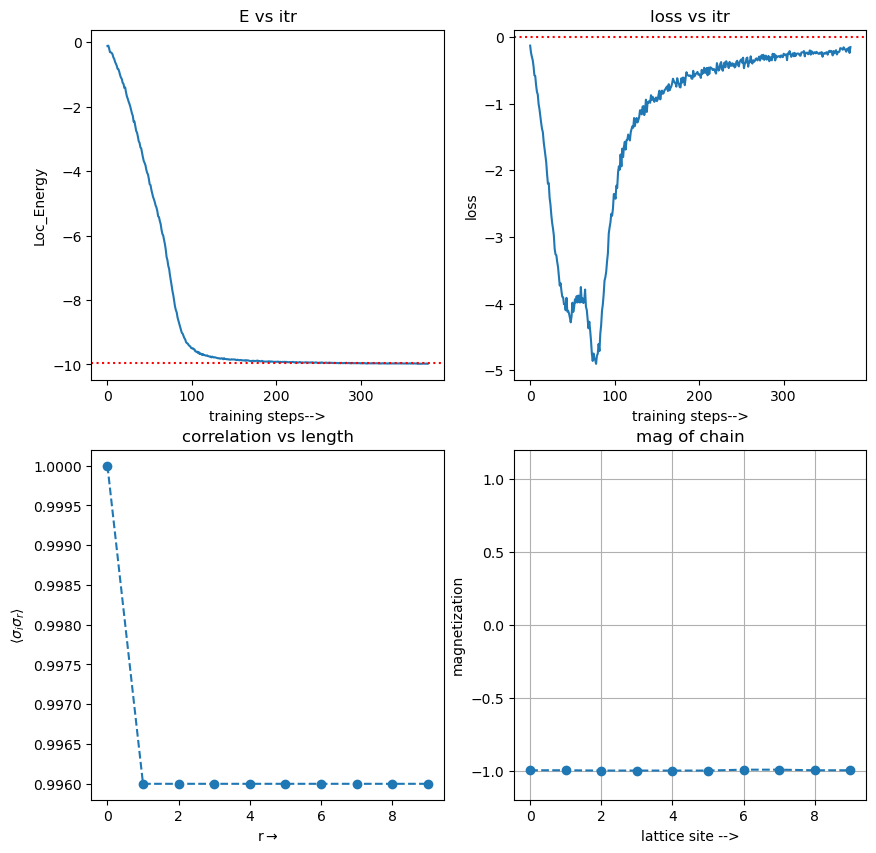

In [12]:
run_param(J=1,h=0.0001)